Here I use the premade modules to 
* read in, clean and 
* transform the raw input data. 

Then I evaluate the transformed data.

**The output should be a suitable input for a tensorflow CNN model.**

## 0. Dependencies
<a id = 'sec1'></a>

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import sys
sys.path.append('../utils/')
import data_cleaning 
import get_data
from labelled_image_preparation import data_to_labelled_img
from labels import trading_strategies
from transform  import gramian_angular_field, recurrence_plot, markov_transition_field
from visualize import ts_with_markers


# 1. Read in and clean data

In [19]:
# collecting all data here
datas = []

## 1.1. Stocks

In [20]:
assets= 'Stocks'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

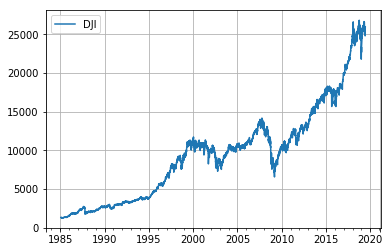

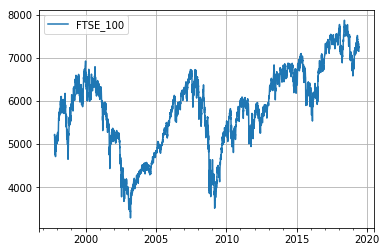

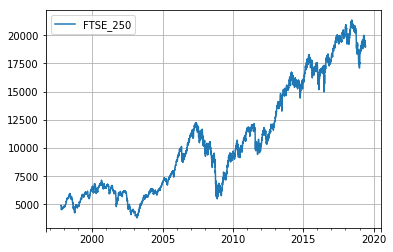

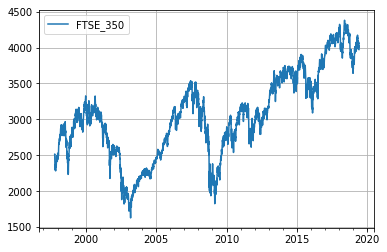

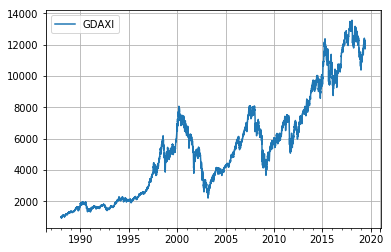

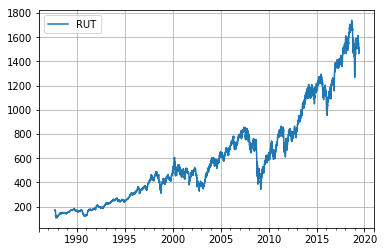

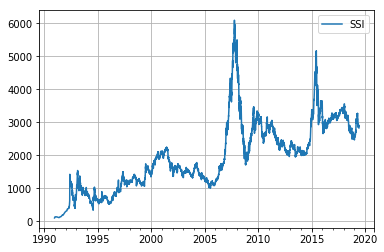

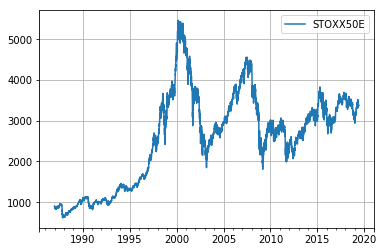

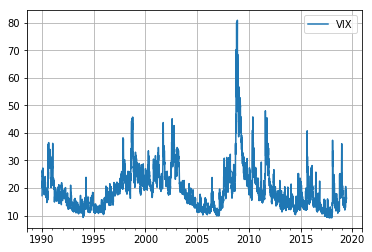

In [21]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.2. Data to test on

In [22]:
assets= 'Testing'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

# a seperate dataset for those used for testing to create the test data later
datas_test = []

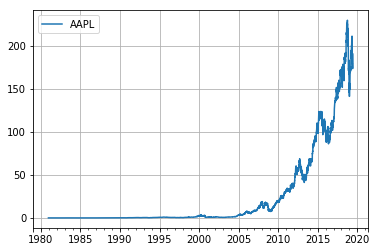

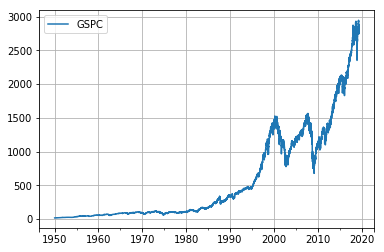

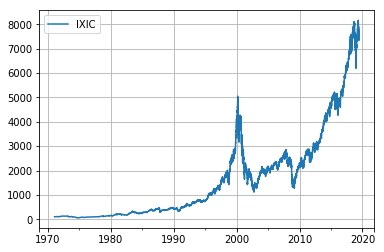

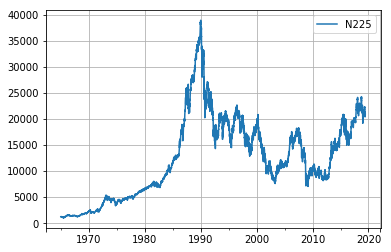

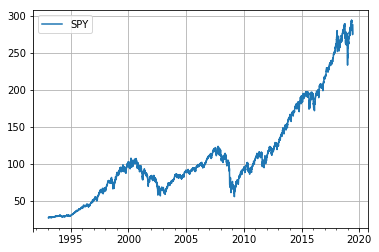

In [23]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    datas_test.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.3. ETFs

In [24]:
assets= 'ETF'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

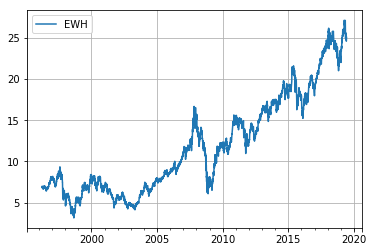

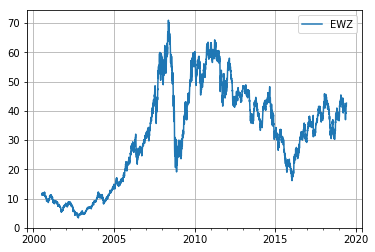

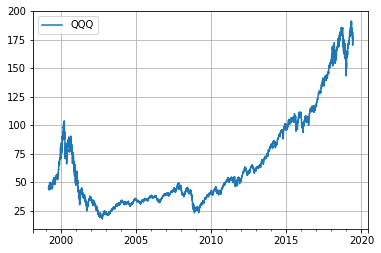

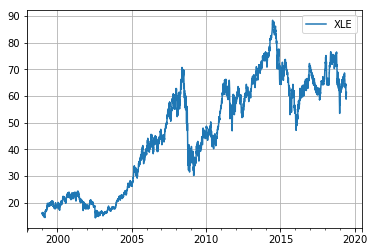

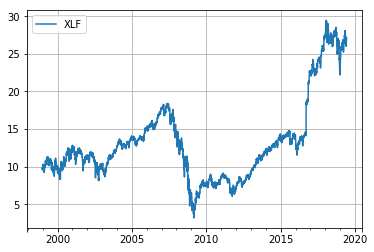

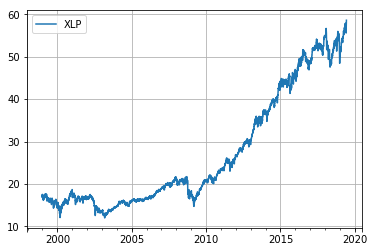

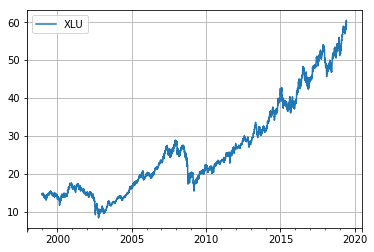

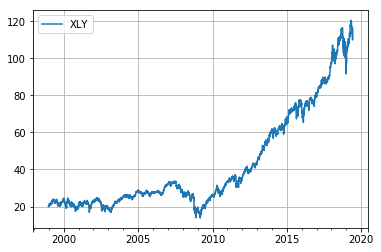

In [25]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.4. FX

In [26]:
assets= 'FX'
path = "../data/data_raw/" + assets
VarName = "Price"

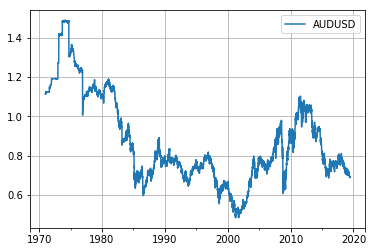

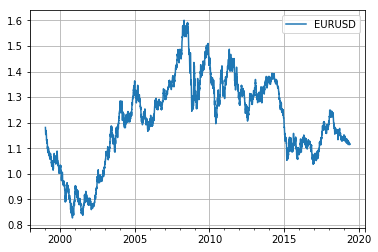

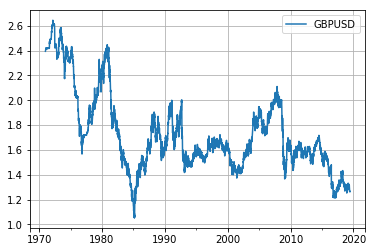

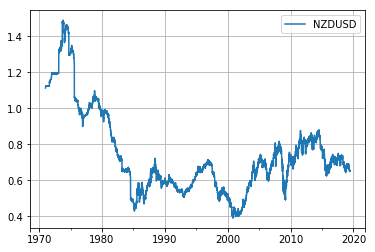

In [27]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "DATE",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

## 1.5. Commods

In [28]:
assets= 'Commods'
path = "../data/data_raw/" + assets
VarName = "price"

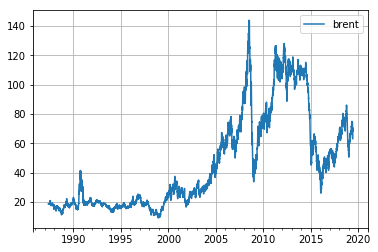

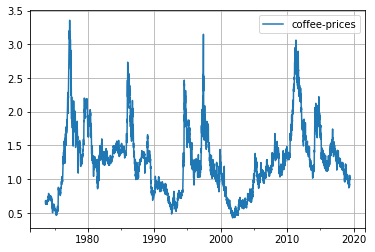

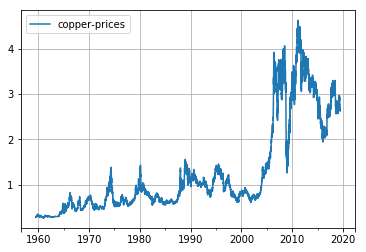

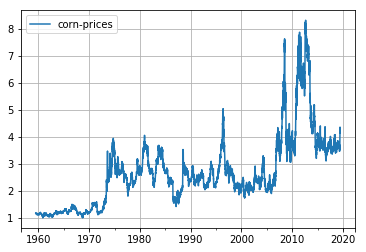

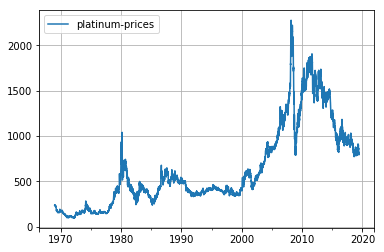

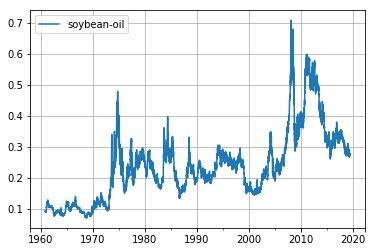

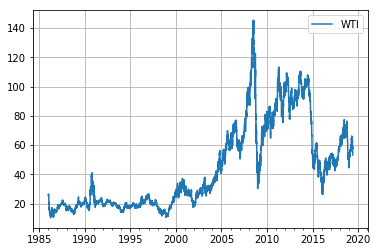

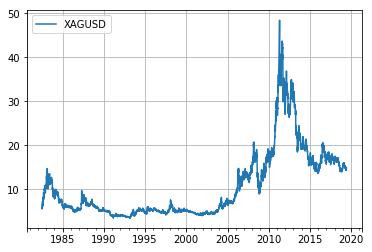

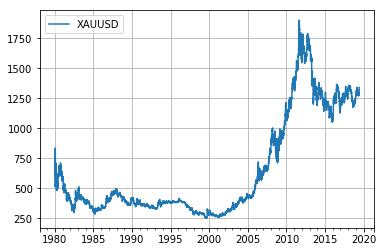

In [29]:
f = open('../data/logs/data_prep_log_'+ assets + '.txt', 'w')
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas.append(df)
    
    # print to log file
    print(name[:-4], file = f)
    print(df.head(), file = f)
    print("Missing values: "+ str(num_missing), file = f)
    print("Summary", file = f)
    print(df.describe(), file = f)
    
    # print(name[:-4]) 
    # df.info()
    df.plot(grid = True)
                     
f.close()

### Datasets:

In [30]:
print("Number of datasets overall: " + str(len(datas)) + ", number of test datasets: " + str(len(datas_test)))

Number of datasets overall: 35, number of test datasets: 5


# 2. Data Labelling & Image transformation
<a id = 'sec3'></a>

### Decide hyperparameters of transformation

In [ ]:
Label_window_size = 3
Image_window_size = 25

# image transformation strategy (will be for all)
Image_trf = ["RP", "GADF", "MTF"]

Return = True

Below is made, so the last floor(label_window_size/2) images are discarded, since we cannot provide a label for them

In [ ]:
labelled_pds

In [ ]:
for data in datas:
    labelled_pd, images, image_labels, label_names = data_to_labelled_img(
        data=data, 
        column_name=VarName, 
        label_window_size = Label_window_size, 
        image_window_size = Image_window_size, 
        image_trf_strat = Image_trf,
        padding_RP = 1,
        standardize_out_RP = True,
        standardize_out_GADF = True,
        standardize_out_GASF = True,
        use_returns = Return
    )
    

In [ ]:
labelled_pd.describe()

In [ ]:
np.amax(images)

In [ ]:
np.amin(images)

### Show labelled data

In [ ]:
fig = ts_with_markers.plot_ts_markers(data = labelled_pd,
        main_col = 'Series',
        by_col = "Strategy",
        to_mark = ["Sell", "Buy"],
        color = ['g', 'r'],
        marker_type = ['v', '^']
        )
fig.set_size_inches(20, 10)
fig.show()

### Print images

In [ ]:
for idx, image in enumerate(images[:20,:,:,2]):
    plt.imshow(image, cmap = "Greys")
    plt.title(label_names[np.int(np.argwhere(image_labels[idx]))])
    plt.show()

### Labels

In [ ]:
label_names

In [ ]:
image_labels.sum(axis=0)

## Save images and labels

In [ ]:
np.savez('../data/cnn_input/test_'+ str(name) + "_" + str(VarName) + "_" + str(Freq) + "_Return" + str(Return) + "_LWS" + str(Label_window_size) + "_IWS" + str(Image_window_size) + "_Trf" + str(Image_trf),
         images = images, image_labels = image_labels, label_names = label_names
        )